### Importación de librerías

Importamos las librerías necesarias para el procesamiento y análisis de datos:

- `pandas`: utilizado para la manipulación de datos en estructuras tipo DataFrame.
- `numpy`: proporciona funciones numéricas y estructuras de datos eficientes.
- `polars`: alternativa a pandas, optimizada para velocidad y procesamiento columnar.
- `itertools.chain`: para concatenar iterables de forma eficiente.
- `re`: módulo de expresiones regulares para procesamiento y limpieza de texto.
- `seaborn`: biblioteca para visualización de datos basada en Matplotlib.
- `matplotlib.pyplot`: módulo principal de Matplotlib para crear gráficos 2D.

In [2]:
!pip install polars

In [3]:
import pandas as pd
import numpy as np
import polars as pl
from itertools import chain
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

Cargamos el dataset en excel utilizando `pandas` para hacer el preprocesado y hacemos una vista general.

In [5]:
df = pd.read_csv('../../Data/csv/full_df.csv')

In [6]:
df.head(1)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg


### Listado de tareas de preprocesamiento

A continuación se resumen los pasos clave para preparar el dataset antes del análisis o modelado:

- **ID**: eliminar esta columna porque es solo un identificador único que no aporta información predictiva.

- **Patient Sex**: transformar a variable binaria para que el modelo pueda interpretarla fácilmente.

- **Left-Fundus** y **Right-Fundus**: crearemos otra columna en la que nos indicará si se trata del ojo derecho o izquierdo.

- **Left-Diagnostic Keywords** y **Right-Diagnostic Keywords**: consideramos eliminar estas columnas ya que vamos a crear una columna que indicara la enfermedad por ojo de forma individual.

- **N, D, G, C, A, H, M, O**: estas columnas corresponden a las clases objetivo (target) para la predicción, se eliminaran ya que tenemos la información en `labels`.

- **filepath** y **target**: después de nuestro planteamiento estas columnas pueden ser eliminadas ya que no tienen más valor.  

- **labels**: tras considerarlo, se usará `label encoder` para crear un código del target para cada enfermedad considerando que es buena opción y que no afectará a la hora de entrenar el modelo.

- **filename**: nos lo quedamos como referencia de que ojo se trata.
 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

#### Transformamos `Patient_Sex_Binario` a binario

In [8]:
#Transformar a binario el campo Patient Sex
df['Patient_Sex_Binario'] = df['Patient Sex'].map({'Male': 1, "Female": 0})


In [9]:
df.Patient_Sex_Binario.head(10)

0    0
1    1
2    1
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: Patient_Sex_Binario, dtype: int64

In [10]:
df.drop(columns=['Patient Sex'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Left-Fundus                6392 non-null   object
 3   Right-Fundus               6392 non-null   object
 4   Left-Diagnostic Keywords   6392 non-null   object
 5   Right-Diagnostic Keywords  6392 non-null   object
 6   N                          6392 non-null   int64 
 7   D                          6392 non-null   int64 
 8   G                          6392 non-null   int64 
 9   C                          6392 non-null   int64 
 10  A                          6392 non-null   int64 
 11  H                          6392 non-null   int64 
 12  M                          6392 non-null   int64 
 13  O                          6392 non-null   int64 
 14  filepath

- opcional crear columna categorica con la cantidad de enfermedades.
- opcional crear columna Binaria con si es lens dust o no 0/1

In [12]:
df.head(5)           


,ID,Patient Age,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,Patient_Sex_Binario
0,0,69,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,0
1,1,57,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,1
2,2,42,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,1
3,4,53,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,1
4,5,50,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,0


Eliminamos las columnas que no son necesarias para nuestro dataset final:

- `'Left-Diagnostic Keywords'`
- `'Right-Diagnostic Keywords'`

In [13]:
df.drop(columns=['Left-Diagnostic Keywords', 'Right-Diagnostic Keywords'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6392 non-null   int64 
 1   Patient Age          6392 non-null   int64 
 2   Left-Fundus          6392 non-null   object
 3   Right-Fundus         6392 non-null   object
 4   N                    6392 non-null   int64 
 5   D                    6392 non-null   int64 
 6   G                    6392 non-null   int64 
 7   C                    6392 non-null   int64 
 8   A                    6392 non-null   int64 
 9   H                    6392 non-null   int64 
 10  M                    6392 non-null   int64 
 11  O                    6392 non-null   int64 
 12  filepath             6392 non-null   object
 13  labels               6392 non-null   object
 14  target               6392 non-null   object
 15  filename             6392 non-null   object
 16  Patien

In [15]:
df.drop(columns=['Left-Fundus', 'Right-Fundus','N','D','G','C','A','H','M','O','filepath','target',], inplace=True)

In [16]:
#nos quedamos con los pacientes mayores de 1 año
df = df[df['Patient Age'] > 1]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6364 entries, 0 to 6391
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6364 non-null   int64 
 1   Patient Age          6364 non-null   int64 
 2   labels               6364 non-null   object
 3   filename             6364 non-null   object
 4   Patient_Sex_Binario  6364 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 298.3+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador
le = LabelEncoder()

df['cod_target'] = le.fit_transform(df['labels'])


In [19]:
df.head(5)

,ID,Patient Age,labels,filename,Patient_Sex_Binario,cod_target
0,0,69,['N'],0_right.jpg,0,6
1,1,57,['N'],1_right.jpg,1,6
2,2,42,['D'],2_right.jpg,1,2
3,4,53,['D'],4_right.jpg,1,2
4,5,50,['D'],5_right.jpg,0,2


In [20]:
df.drop(columns=['labels'], inplace=True)
df.head(5)

,ID,Patient Age,filename,Patient_Sex_Binario,cod_target
0,0,69,0_right.jpg,0,6
1,1,57,1_right.jpg,1,6
2,2,42,2_right.jpg,1,2
3,4,53,4_right.jpg,1,2
4,5,50,5_right.jpg,0,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6364 entries, 0 to 6391
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6364 non-null   int64 
 1   Patient Age          6364 non-null   int64 
 2   filename             6364 non-null   object
 3   Patient_Sex_Binario  6364 non-null   int64 
 4   cod_target           6364 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 298.3+ KB


Tenemos las columnas `left_idx` y `right_idx`, que contienen datos en forma de listas.

En este caso, **no realizaremos ninguna transformación adicional**, ya que PyTorch permite convertir listas directamente a tensores utilizando `torch.tensor()`:

# Análisis de la Matriz de Correlación

Calculamos la matriz de correlación entre las variables numéricas del dataset:

- **Patient Age**
- **Patient_Sex_Binario**
- **cod_target**

Matriz de correlación:
                           ID  Patient Age  Patient_Sex_Binario  cod_target
ID                   1.000000    -0.168137             0.056720   -0.137129
Patient Age         -0.168137     1.000000            -0.122443   -0.040625
Patient_Sex_Binario  0.056720    -0.122443             1.000000   -0.012926
cod_target          -0.137129    -0.040625            -0.012926    1.000000


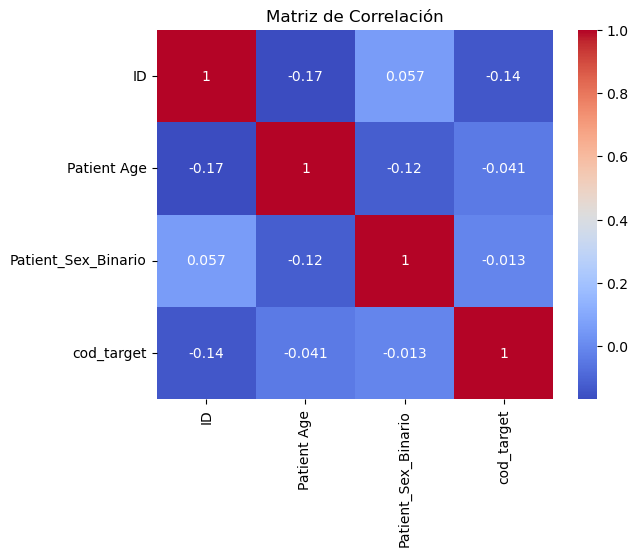

In [22]:
numeric_cols = ['ID', 'Patient Age', 'Patient_Sex_Binario', 'cod_target']
df_numeric = df[numeric_cols]

correlation_matrix = df_numeric.corr()

print("Matriz de correlación:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Resultados

- Ninguna de las variables numéricas presenta correlaciones fuertes entre sí.
- Como sospechabamos, la columna **ID** no esta aportando información útil, por lo que vamos a eliminarla.

In [23]:
df.drop(columns=['ID'], inplace=True)
df.head(3)

,Patient Age,filename,Patient_Sex_Binario,cod_target
0,69,0_right.jpg,0,6
1,57,1_right.jpg,1,6
2,42,2_right.jpg,1,2


### Guardamos el dataset en formato Parquet

Se eligió Parquet por ser un formato óptimo para análisis de datos a escala.

- **Eficiente**: ocupa menos espacio que CSV gracias a la compresión columnar.
- **Rápido**: permite lectura y escritura más rápida, especialmente al trabajar con columnas específicas.
- **Compatible**: ampliamente soportado por pandas, PySpark (que usaremos mas adelante) y otras herramientas de análisis.


In [24]:
df_pl = pl.from_pandas(df, rechunk=True)

In [25]:
df_pl.write_parquet(
    "dataset_meta_ojouni.parquet",
    compression="zstd",        # 'snappy' por defecto; zstd comprime ~25-40 % más
    compression_level=5        # 1-22; 5-7 suele ser buen balance
)